# Model Training & Evaluation
---

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ccc['year'].value_counts()

In [ ]:
# data found from US Census Bureau for wealth inequality
# drop na to remove irrelevant rows (footnotes)
wealth = pd.read_excel('/content/drive/My Drive/DAT 490 Capstone Project/Project Data/Census Bureau Wealth Inequality/Census Bureau Income Dist 1967-2023.xlsx'
                        , header = 5).rename(columns = {'Unnamed: 0':'year'}).dropna()

# replace newline char with space in column names
wealth.columns = wealth.columns.str.replace('\s', ' ', regex = True)

# clean year column
wealth['year'] = wealth['year'].replace('\s',' ', regex = True).replace('\s.*','', regex = True)

# drop duplicate years
wealth.drop_duplicates(subset = ['year'], keep = 'first', inplace = True)

In [ ]:
geowealth = pd.read_csv('/content/drive/My Drive/DAT 490 Capstone Project/Data For Final Results/GEOWEALTH-US/state_wealth_inequality.csv')
navco_us = pd.read_excel('/content/drive/My Drive/DAT 490 Capstone Project/Data For Final Results/NAVCO 3.0 Dataset/NAVCO3.0_US.xlsx')
inflation = pd.read_csv('/content/drive/My Drive/DAT 490 Capstone Project/Data For Final Results/Annual-inflation/inflation-gdp.csv')
ccc_1 = pd.read_csv('/content/drive/My Drive/DAT 490 Capstone Project/Data For Final Results/Crowd Counting Consortium Dataset/ccc_compiled_2017-2020.csv', encoding='latin-1'); # encoding changed to 'latin-1' to avoid an error
ccc_2 = pd.read_csv('/content/drive/My Drive/DAT 490 Capstone Project/Data For Final Results/Crowd Counting Consortium Dataset/ccc_compiled_2021-present.csv', encoding='latin-1');

ccc = pd.concat([ccc_1, ccc_2]) # Append ccc_2 to ccc_1 to create full ccc dataset

<ipython-input-4-bd5c11c790e0>:4: DtypeWarning: Columns (7,10,24,26,37,38,39,40,41,42,43,44,45,46,47,48,49,53,59) have mixed types. Specify dtype option on import or set low_memory=False.
  ccc_1 = pd.read_csv('/content/drive/My Drive/DAT 490 Capstone Project/Data For Final Results/Crowd Counting Consortium Dataset/ccc_compiled_2017-2020.csv', encoding='latin-1'); # encoding changed to 'latin-1' to avoid an error
<ipython-input-4-bd5c11c790e0>:5: DtypeWarning: Columns (22,24,31,32,51,52,53,54,55,56,57,58,59,60,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  ccc_2 = pd.read_csv('/content/drive/My Drive/DAT 490 Capstone Project/Data For Final Results/Crowd Counting Consortium Dataset/ccc_compiled_2021-present.csv', encoding='latin-1');


### EDA (run first)

In [ ]:
inflation[inflation['Country'] == 'United States']

,Country,Country Code,Year,Inflation
10559,United States,USA,1961,1.350154
10560,United States,USA,1962,1.244635
10561,United States,USA,1963,1.088386
10562,United States,USA,1964,1.503940
10563,United States,USA,1965,1.919826
10564,United States,USA,1966,2.898779
10565,United States,USA,1967,3.151279
10566,United States,USA,1968,4.367188
10567,United States,USA,1969,4.958488
10568,United States,USA,1970,2.211442


In [ ]:
# Consumer Price Index Data from Bureau of Labor Statistics

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
worksheet = gc.open('BLS CPI 1999-2024').sheet1
rows = worksheet.get_all_values()

CPI = pd.DataFrame.from_records(rows)
CPI = pd.DataFrame(data = CPI.values[1:], columns = CPI.iloc[0])

CPI

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,1999,164.3,164.5,165,166.2,166.2,166.2,166.7,167.1,167.9,168.2,168.3,168.3,166.6,165.4,167.8
1,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174,174.1,174,172.2,170.8,173.6
2,2001,175.1,175.8,176.2,176.9,177.7,178,177.5,177.5,178.3,177.7,177.4,176.7,177.1,176.6,177.5
3,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181,181.3,181.3,180.9,179.9,178.9,180.9
4,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185,184.5,184.3,184,183.3,184.6
5,2004,185.2,186.2,187.4,188,189.1,189.7,189.4,189.5,189.9,190.9,191,190.3,188.9,187.6,190.2
6,2005,190.7,191.8,193.3,194.6,194.4,194.5,195.4,196.4,198.8,199.2,197.6,196.8,195.3,193.2,197.4
7,2006,198.3,198.7,199.8,201.5,202.5,202.9,203.5,203.9,202.9,201.8,201.5,201.8,201.6,200.6,202.6
8,2007,202.416,203.499,205.352,206.686,207.949,208.352,208.299,207.917,208.49,208.936,210.177,210.036,207.342,205.709,208.976
9,2008,211.08,211.693,213.528,214.823,216.632,218.815,219.964,219.086,218.783,216.573,212.425,210.228,215.303,214.429,216.177


In [ ]:
# create dataframe for monthly inflation data
CPI_month = CPI.melt(id_vars = 'Year', value_vars = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
         var_name = 'month', value_name = 'CPI').rename(columns = {'Year':'year'})

# update month to categorical dtype for sorting
CPI_month['month'] = CPI_month['month'].astype(pd.CategoricalDtype(categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered = True))

# dictionary for converting month names to numbers
months_dict = {}
x = 1

for i in CPI_month['month'].unique():
  months_dict[i] = x
  x += 1

# convert months to integers
CPI_month['month'] = CPI_month['month'].map(months_dict)
CPI_month['month'] = CPI_month['month'].astype(int)

# update CPI dtype to float, year to int
CPI_month['CPI'] = CPI_month['CPI'].replace('','0.0').astype(float).replace(0.0,np.nan)
CPI_month['year'] = CPI_month['year'].astype(int)

# calculate % monthly change in CPI
CPI_month['Monthly % Change'] = round(CPI_month['CPI'].replace(np.nan,0.0).pct_change() * 100,4)

# drop null values & sort
CPI_month = CPI_month[CPI_month['year'] > 1999].dropna().sort_values(by = ['year', 'month']).reset_index(drop = True)

CPI_month

,year,month,CPI,Monthly % Change
0,2000,1,168.800,2.7389
1,2000,2,169.800,3.2219
2,2000,3,171.200,3.7576
3,2000,4,171.300,3.0686
4,2000,5,171.500,3.1889
...,...,...,...,...
291,2024,4,313.548,3.3574
292,2024,5,314.069,3.2690
293,2024,6,314.175,2.9714
294,2024,7,314.540,2.8948


In [ ]:
# create dataframe for annual inflation data
CPI_year = CPI[['Year', 'Annual']].rename(columns = {'Year':'year','Annual':'CPI'})

# convert dtypes
CPI_year = CPI_year.replace('','0.0').astype({'year':'int', 'CPI':'float'}).replace(0.0,np.nan)

# add annual inflation for 2024
CPI_year.iloc[-1:] = [2024, np.mean(CPI_month['CPI'].loc[CPI_month['year'] == 2024])]

# # calculate % annual change in CPI
CPI_year['annual % Change'] = round(CPI_year['CPI'].pct_change() * 100, 4)

# drop null values
CPI_year = CPI_year.dropna()

CPI_year

,year,CPI,annual % Change
1,2000,172.200000,3.3613
2,2001,177.100000,2.8455
3,2002,179.900000,1.5810
4,2003,184.000000,2.2790
5,2004,188.900000,2.6630
6,2005,195.300000,3.3880
7,2006,201.600000,3.2258
8,2007,207.342000,2.8482
9,2008,215.303000,3.8396
10,2009,214.537000,-0.3558


In [ ]:
# geowealth.rename(columns={'year': 'year'}, inplace=True)


# # Assuming your DataFrame is named df
# # Convert the 'date' column to a datetime object
# ccc['date'] = pd.to_datetime(ccc['date'])

# # Extract the year and create a new 'year' column
# ccc['year'] = ccc['date'].dt.year

# adding year and month columns to ccc data
ccc['year'] = ccc['date'].str[:4]
ccc['month'] = ccc['date'].str[5:7]
ccc[['year', 'month']] = ccc[['year', 'month']].astype(np.int64)

# # Convert the 'date' column to a datetime object
# navco_us['date'] = pd.to_datetime(navco_us['date'])

# Extract the year and create a new 'year' column
navco_us['year'] = navco_us['date'].astype(str).str[:4]

# Now you have the 'year' column, and you can use it for merging or analysis
print(ccc[['date', 'year']].head())  # Display the first few rows to check
print(navco_us[['date', 'year']].head())

         date  year
0  2017-01-01  2017
1  2017-01-01  2017
2  2017-01-01  2017
3  2017-01-01  2017
4  2017-01-01  2017
        date  year
0 2007-01-21  2007
1 2007-01-23  2007
2 2007-03-08  2007
3 2007-03-19  2007
4 2007-04-15  2007


In [ ]:
pd.set_option('display.max_columns', None)
print(geowealth.shape)
geowealth.head()

(350, 39)


,year,state,obs,households,wealth_mean,wealth_median,wealth_top1,wealth_top.1,wealth_top.01,wealth_top.001,wealth_top10,wealth_bottom50,wealth_gini,wealth_sd,p90,p10,income_mean,house_value_mean,own,rent,own_outright,own_mortgage,college,white,black,hispanic,female,household_size,age,mean_sd,top1_sd,top.1_sd,top.01_sd,top.001_sd,top10_sd,bottom50_sd,top5_sd,top.5_sd,gini_sd
0,1960,alabama,42847,856940.0,77278.162,35100.750,0.211,0.085,0.034,0.014,0.540,0.062,0.726,234662.739,166974.436,-2126.812,40382.539,48518.843,0.589,0.411,NaN,NaN,0.139,0.738,0.261,0.000,0.177,3.678,47.131,448.374,0.005,0.004,0.002,0.001,0.003,0.000,0.003,0.005,0.017
1,1960,alaska,2750,55000.0,97790.092,36482.414,0.170,0.062,0.026,0.012,0.527,0.244,0.697,187199.257,236162.528,3572.022,66925.968,47580.207,0.456,0.544,NaN,NaN,0.258,0.830,0.030,0.001,0.086,3.480,40.230,4025.317,0.032,0.019,0.008,0.003,0.019,0.378,0.025,0.030,0.028
2,1960,arizona,17694,353880.0,108872.732,45300.973,0.218,0.087,0.036,0.014,0.558,0.069,0.729,280238.536,236346.705,0.000,54434.901,64127.141,0.625,0.375,NaN,NaN,0.247,0.920,0.034,0.003,0.151,3.463,45.635,1082.775,0.007,0.004,0.001,0.001,0.004,0.001,0.006,0.006,0.021
3,1960,arkansas,25150,503000.0,73961.529,35263.136,0.161,0.059,0.023,0.009,0.507,0.072,0.689,147355.794,176916.020,-1981.737,32873.483,41309.995,0.602,0.398,NaN,NaN,0.132,0.812,0.187,0.000,0.168,3.412,49.749,1649.743,0.018,0.012,0.007,0.002,0.011,0.002,0.014,0.018,0.019
4,1960,california,237916,4758320.0,141314.694,60621.910,0.224,0.088,0.036,0.014,0.559,0.058,0.743,387565.887,293638.340,-2229.737,63436.406,85868.095,0.565,0.435,NaN,NaN,0.281,0.931,0.049,0.001,0.184,3.079,46.396,1547.357,0.009,0.006,0.003,0.001,0.005,0.001,0.006,0.009,0.020


In [ ]:
# Count NaN values in each column
print(geowealth.isna().sum())

year                 0
state                0
obs                  0
households           0
wealth_mean          0
wealth_median        0
wealth_top1          0
wealth_top.1         0
wealth_top.01        0
wealth_top.001       0
wealth_top10         0
wealth_bottom50      0
wealth_gini          0
wealth_sd            0
p90                  0
p10                  0
income_mean          0
house_value_mean     0
own                  0
rent                 0
own_outright        95
own_mortgage        95
college              0
white                0
black                0
hispanic             0
female               0
household_size       0
age                  0
mean_sd              0
top1_sd              0
top.1_sd             0
top.01_sd            0
top.001_sd           0
top10_sd             0
bottom50_sd          0
top5_sd              0
top.5_sd             0
gini_sd              0
dtype: int64


In [ ]:
# The nulls are only in 1960 and 1970, so imputing may not be the best route to take?
for i in geowealth['year'].unique():
  print(f'There are {geowealth.loc[geowealth["year"] == i].isna().sum().sum()} null values for the Year {i}.')

# Maybe we can focus on later years since that's most likely what we'll be using from other datasets too.

There are 102 null values for the Year 1960.
There are 88 null values for the Year 1970.
There are 0 null values for the Year 1980.
There are 0 null values for the Year 1990.
There are 0 null values for the Year 2000.
There are 0 null values for the Year 2010.
There are 0 null values for the Year 2020.


In [ ]:
# Since only roughly 27% of the values in the columns 'own_outright' and 'own_mortgage' contain null values, I will be
# using a KNNImputer to fill the missing values based on nearest neighbors.

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
geowealth[['own_outright', 'own_mortgage']] = imputer.fit_transform(geowealth[['own_outright', 'own_mortgage']])

# Count NaN values in each column again
print(geowealth.isna().sum())

year                0
state               0
obs                 0
households          0
wealth_mean         0
wealth_median       0
wealth_top1         0
wealth_top.1        0
wealth_top.01       0
wealth_top.001      0
wealth_top10        0
wealth_bottom50     0
wealth_gini         0
wealth_sd           0
p90                 0
p10                 0
income_mean         0
house_value_mean    0
own                 0
rent                0
own_outright        0
own_mortgage        0
college             0
white               0
black               0
hispanic            0
female              0
household_size      0
age                 0
mean_sd             0
top1_sd             0
top.1_sd            0
top.01_sd           0
top.001_sd          0
top10_sd            0
bottom50_sd         0
top5_sd             0
top.5_sd            0
gini_sd             0
dtype: int64


In [ ]:
print(navco_us.shape)
navco_us.head()

(1775, 38)


,coder,event_desc,country_name,cowcode,date,source_title,geo_scope,localities,actor_id,cameo_actor_3,cameo_actor_6,cameo_actor_9,event_actor_list,verb_10,verb_100,verb_1000,target_3,target_6,target_9,camp_goals,tactical_choice,nv_categ,nc_type,nv_commission,nv_concentration,nv_tactic_ns,v_tactic_ns,st_posture,fatal_casu,injuries,num_partic_event,damage,econ_impact,econ_impact_aux,arbitration,notes,decision,year
0,AS,scholar at New America Foundation states Bush ...,United States,2,2007-01-21,US aims to trump skeptics with Mideast push,2,Washington,4,NON,ELI,IND,"Anatol Lieven, a scholar at the New America Fo...",11,111,NaN,GOV,TOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,actor_code changed to NON ELI IND,2007
1,AS,US implements Western Hemisphere Travel Initia...,United States,2,2007-01-23,Americans and their neighbors must fly with pa...,3,Washington,1,GOV,NaN,NaN,US Government,17,172,NaN,REB,MOS,HAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,verb code?,"verb code appears appropriate, kept as is",2007
2,AS,China publishes accusatory human rights report,United States,2,2007-03-08,China takes US to task in human rights retort,4,Beijing,3,CHN,GOV,NaN,the State Council,11,112,1122.0,GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,report titled: The Human Rights Record of the ...,"coding appears appropriate, kept as is",2007
3,AS,Democrats in the Senate denounce Bush's war in...,United States,2,2007-03-19,Bush warns against US pullout in Iraq on war's...,2,Washington,2,OPP,LEG,TOP,Senate Majority Leader Harry Reid,11,111,NaN,GOV,TOP,NaN,2.0,1.0,0.0,NaN,NaN,NaN,statement denouncing conduct of the war,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,states the war has been a series of blunders,verb coded as 111,2007
4,AS,security forces on strike in Texas,United States,2,2007-04-15,Strike at US nuclear weapons site raises secur...,1,"Amarillo, TX",2,ACT,LAB,NaN,Pantex Guards Union,14,141,NaN,GOV,BUS,TOP,2.0,1.0,2.0,3.0,0.0,0.0,conducted a six week strike for retirement ben...,NaN,NaN,NaN,NaN,500,NaN,NaN,NaN,1,not really a political issue but has the Dept....,based on review of source does appear to be po...,2007


In [ ]:
# Count NaN values in each column
print(navco_us.isna().sum()) # yikes that's a lot of null values

coder                  0
event_desc             0
country_name           0
cowcode                0
date                   0
source_title           0
geo_scope              0
localities             0
actor_id               0
cameo_actor_3          0
cameo_actor_6        354
cameo_actor_9       1358
event_actor_list       0
verb_10                0
verb_100               0
verb_1000           1160
target_3               0
target_6             679
target_9            1509
camp_goals          1043
tactical_choice     1044
nv_categ            1064
nc_type             1670
nv_commission       1384
nv_concentration    1398
nv_tactic_ns        1060
v_tactic_ns         1748
st_posture          1552
fatal_casu          1685
injuries            1685
num_partic_event    1503
damage              1770
econ_impact         1771
econ_impact_aux     1770
arbitration            0
notes               1259
decision            1576
year                   0
dtype: int64


In [ ]:
# To start I will plan on dropping any columns containing 50% or more NaN values
threshold = len(navco_us) * 0.5

# Drop columns with 50% or more NaN values
navco_us = navco_us.dropna(thresh=threshold, axis=1)

# Count NaN values in each column again
print(navco_us.isna().sum())

coder                 0
event_desc            0
country_name          0
cowcode               0
date                  0
source_title          0
geo_scope             0
localities            0
actor_id              0
cameo_actor_3         0
cameo_actor_6       354
event_actor_list      0
verb_10               0
verb_100              0
target_3              0
target_6            679
arbitration           0
year                  0
dtype: int64


In [ ]:
print(CPI_year.shape)
CPI_year.head()

(25, 3)


,year,CPI,annual % Change
1,2000,172.2,3.3613
2,2001,177.1,2.8455
3,2002,179.9,1.5810
4,2003,184.0,2.2790
5,2004,188.9,2.6630


In [ ]:
# Count NaN values in each column
print(CPI_year.isna().sum())

0
year               0
CPI                0
annual % Change    0
dtype: int64


In [ ]:
print(ccc.shape)
ccc.head()

(200853, 72)


,date,locality,state,location_detail,online,type,title,macroevent,actors,organizations,participants,claims,valence,issues,issues_major,size_text,size_low,size_high,size_mean,size_cat,arrests,arrests_any,injuries_crowd,injuries_crowd_any,injuries_police,injuries_police_any,property_damage,property_damage_any,chemical_agents,participant_measures,police_measures,participant_deaths,police_deaths,source_1,source_2,source_3,source_4,source_5,source_6,source_7,source_8,source_9,source_10,source_11,source_12,source_13,source_14,source_15,source_16,source_17,source_18,source_19,source_20,source_21,source_22,source_23,source_24,source_25,source_26,source_27,source_28,source_29,source_30,notes,lat,lon,resolved_locality,resolved_county,resolved_state,fips_code,year,month
0,2017-01-01,Washington,DC,Lafayette Square Park,0.0,vigil,White House Peace Vigil,NaN,NaN,NaN,NaN,"for banning nuclear weapons, for peace",0.0,military,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/White_House_Peac...,https://www.youtube.com/watch?v=uy5PQNRNk2s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White House Peace Vigil continuous since June ...,38.907192,-77.036871,Washington,District of Columbia,DC,11001.0,2017,1
1,2017-01-01,Mankato,MN,NaN,0.0,vigil,NaN,NaN,Peace Vigil Mankato,Peace Vigil Mankato,NaN,for peace,0.0,military,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,https://www.mankatofreepress.com/news/local_ne...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,every Sunday since 2001,44.163578,-93.999400,Mankato,Blue Earth County,MN,27013.0,2017,1
2,2017-01-01,Minneapolis,MN,U.S. Bank Stadium,0.0,protest; banner drop,NaN,NaN,general protestors,NaN,NaN,"against the Dakota Access Pipeline, for indige...",1.0,banking and finance; economy; energy; environm...,NaN,2,2.0,2.0,2.0,1,2,1,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,https://www.reuters.com/article/us-northdakota...,https://www.nbcnews.com/storyline/dakota-pipel...,https://www.twincities.com/2017/01/01/protest-...,https://bleacherreport.com/articles/2684655-pr...,https://www.startribune.com/pipeline-protestor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hung banner from stadium roof during NFL game,44.977753,-93.265011,Minneapolis,Hennepin County,MN,27053.0,2017,1
3,2017-01-01,Little Compton,RI,Town Green,0.0,vigil,NaN,NaN,Sakonnet Peace Alliance,Sakonnet Peace Alliance,NaN,"for peace, for gun control, for climate action",1.0,environment; guns; military,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,https://ecori.org/hardy-little-compton-allianc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,every Sunday since 2003,41.510103,-71.171156,Little Compton,Newport County,RI,44005.0,2017,1
4,2017-01-01,Oak Ridge,TN,Y-12 National Security Complex,0.0,vigil,NaN,NaN,Oak Ridge Environmental Peace Alliance,Oak Ridge Environmental Peace Alliance,NaN,for abolishing nuclear weapons,0.0,military,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,https://www.orepa.org/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,every Sunday since the late 1990s,36.010356,-84.269645,Oak Ridge,Anderson County,TN,47001.0,2017,1


In [ ]:
# Beginning cleaning up missing values. Upon checking the data dictionary for this dataset, all of the columns labeled 'source_n' are safe to drop.
columns_to_drop = ccc.filter(like='source_').columns
ccc = ccc.drop(columns=columns_to_drop)

# Checking the results
ccc.head()

,date,locality,state,location_detail,online,type,title,macroevent,actors,organizations,participants,claims,valence,issues,issues_major,size_text,size_low,size_high,size_mean,size_cat,arrests,arrests_any,injuries_crowd,injuries_crowd_any,injuries_police,injuries_police_any,property_damage,property_damage_any,chemical_agents,participant_measures,police_measures,participant_deaths,police_deaths,notes,lat,lon,resolved_locality,resolved_county,resolved_state,fips_code,year,month
0,2017-01-01,Washington,DC,Lafayette Square Park,0.0,vigil,White House Peace Vigil,NaN,NaN,NaN,NaN,"for banning nuclear weapons, for peace",0.0,military,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,White House Peace Vigil continuous since June ...,38.907192,-77.036871,Washington,District of Columbia,DC,11001.0,2017,1
1,2017-01-01,Mankato,MN,NaN,0.0,vigil,NaN,NaN,Peace Vigil Mankato,Peace Vigil Mankato,NaN,for peace,0.0,military,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,every Sunday since 2001,44.163578,-93.999400,Mankato,Blue Earth County,MN,27013.0,2017,1
2,2017-01-01,Minneapolis,MN,U.S. Bank Stadium,0.0,protest; banner drop,NaN,NaN,general protestors,NaN,NaN,"against the Dakota Access Pipeline, for indige...",1.0,banking and finance; economy; energy; environm...,NaN,2,2.0,2.0,2.0,1,2,1,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,hung banner from stadium roof during NFL game,44.977753,-93.265011,Minneapolis,Hennepin County,MN,27053.0,2017,1
3,2017-01-01,Little Compton,RI,Town Green,0.0,vigil,NaN,NaN,Sakonnet Peace Alliance,Sakonnet Peace Alliance,NaN,"for peace, for gun control, for climate action",1.0,environment; guns; military,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,every Sunday since 2003,41.510103,-71.171156,Little Compton,Newport County,RI,44005.0,2017,1
4,2017-01-01,Oak Ridge,TN,Y-12 National Security Complex,0.0,vigil,NaN,NaN,Oak Ridge Environmental Peace Alliance,Oak Ridge Environmental Peace Alliance,NaN,for abolishing nuclear weapons,0.0,military,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,every Sunday since the late 1990s,36.010356,-84.269645,Oak Ridge,Anderson County,TN,47001.0,2017,1


In [ ]:
# Count NaN values in each column
print(ccc.isna().sum())

date                         0
locality                    71
state                       54
location_detail          17986
online                     106
type                       468
title                   147444
macroevent              191839
actors                   29374
organizations           101808
participants            167942
claims                      23
valence                     58
issues                    5807
issues_major             75532
size_text               127015
size_low                120422
size_high               120455
size_mean               120422
size_cat                     0
arrests                 155481
arrests_any                  0
injuries_crowd          156837
injuries_crowd_any           0
injuries_police         157153
injuries_police_any          0
property_damage         156481
property_damage_any          0
chemical_agents          59662
participant_measures    167774
police_measures         191001
participant_deaths      200834
police_d

In [ ]:
# Like before, I will be dropping any columns containing 50% or more NaN values
threshold = len(ccc) * 0.5

# Drop columns with 50% or more NaN values
ccc = ccc.dropna(thresh=threshold, axis=1)

# Count NaN values in each column again
print(ccc.isna().sum())

date                       0
locality                  71
state                     54
location_detail        17986
online                   106
type                     468
actors                 29374
claims                    23
valence                   58
issues                  5807
issues_major           75532
size_cat                   0
arrests_any                0
injuries_crowd_any         0
injuries_police_any        0
property_damage_any        0
chemical_agents        59662
lat                       92
lon                       92
resolved_locality       1487
resolved_county        16813
resolved_state           141
fips_code                232
year                       0
month                      0
dtype: int64


In [ ]:
# # Ensure all datasets have a 'Year' column

# # GEOWEALTH already has 'Year' (assuming)
# # NAVCO, Inflation, CPI, and CCC datasets should be filtered or transformed to include 'Year'

# # Merging datasets on 'Year'
# combined_data = pd.merge(geowealth, navco_us, on='Year')
# # Merge combined_data with navco_us
# #combined_data = pd.merge(combined_data, navco_us, on='Year')

# # Check the result of the merge
# print(combined_data.columns)

# # Now the data is ready for model training

### Merge Data

In [ ]:
display(wealth.head())
display(navco_us.head())
display(ccc.head())
display(CPI_month.head())

,year,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
0,2023,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25
1,2022,17780.0,31190.0,45680.0,60330.0,77540.0,97730.0,123400.0,159100.0,224500.0,306700.0,12.63,2.90,4.36
2,2021,17540.0,31360.0,45380.0,61590.0,79260.0,100500.0,126800.0,167000.0,237400.0,320600.0,13.53,2.99,4.52
3,2020,18310.0,31900.0,46680.0,61520.0,79560.0,100100.0,126900.0,166100.0,236300.0,321700.0,12.90,2.97,4.34
4,2019,18940.0,33200.0,47760.0,63240.0,81210.0,102200.0,129700.0,168400.0,237800.0,319200.0,12.55,2.93,4.29


,coder,event_desc,country_name,cowcode,date,source_title,geo_scope,localities,actor_id,cameo_actor_3,cameo_actor_6,event_actor_list,verb_10,verb_100,target_3,target_6,arbitration,year
0,AS,scholar at New America Foundation states Bush ...,United States,2,2007-01-21,US aims to trump skeptics with Mideast push,2,Washington,4,NON,ELI,"Anatol Lieven, a scholar at the New America Fo...",11,111,GOV,TOP,1,2007
1,AS,US implements Western Hemisphere Travel Initia...,United States,2,2007-01-23,Americans and their neighbors must fly with pa...,3,Washington,1,GOV,NaN,US Government,17,172,REB,MOS,1,2007
2,AS,China publishes accusatory human rights report,United States,2,2007-03-08,China takes US to task in human rights retort,4,Beijing,3,CHN,GOV,the State Council,11,112,GOV,NaN,1,2007
3,AS,Democrats in the Senate denounce Bush's war in...,United States,2,2007-03-19,Bush warns against US pullout in Iraq on war's...,2,Washington,2,OPP,LEG,Senate Majority Leader Harry Reid,11,111,GOV,TOP,1,2007
4,AS,security forces on strike in Texas,United States,2,2007-04-15,Strike at US nuclear weapons site raises secur...,1,"Amarillo, TX",2,ACT,LAB,Pantex Guards Union,14,141,GOV,BUS,1,2007


,date,locality,state,location_detail,online,type,actors,claims,valence,issues,issues_major,size_cat,arrests_any,injuries_crowd_any,injuries_police_any,property_damage_any,chemical_agents,lat,lon,resolved_locality,resolved_county,resolved_state,fips_code,year,month
0,2017-01-01,Washington,DC,Lafayette Square Park,0.0,vigil,NaN,"for banning nuclear weapons, for peace",0.0,military,NaN,0,0,0,0,0,0.0,38.907192,-77.036871,Washington,District of Columbia,DC,11001.0,2017,1
1,2017-01-01,Mankato,MN,NaN,0.0,vigil,Peace Vigil Mankato,for peace,0.0,military,NaN,0,0,0,0,0,0.0,44.163578,-93.999400,Mankato,Blue Earth County,MN,27013.0,2017,1
2,2017-01-01,Minneapolis,MN,U.S. Bank Stadium,0.0,protest; banner drop,general protestors,"against the Dakota Access Pipeline, for indige...",1.0,banking and finance; economy; energy; environm...,NaN,1,1,0,0,0,NaN,44.977753,-93.265011,Minneapolis,Hennepin County,MN,27053.0,2017,1
3,2017-01-01,Little Compton,RI,Town Green,0.0,vigil,Sakonnet Peace Alliance,"for peace, for gun control, for climate action",1.0,environment; guns; military,NaN,0,0,0,0,0,0.0,41.510103,-71.171156,Little Compton,Newport County,RI,44005.0,2017,1
4,2017-01-01,Oak Ridge,TN,Y-12 National Security Complex,0.0,vigil,Oak Ridge Environmental Peace Alliance,for abolishing nuclear weapons,0.0,military,NaN,0,0,0,0,0,0.0,36.010356,-84.269645,Oak Ridge,Anderson County,TN,47001.0,2017,1


,year,month,CPI,Monthly % Change
0,2000,1,168.8,2.7389
1,2000,2,169.8,3.2219
2,2000,3,171.2,3.7576
3,2000,4,171.3,3.0686
4,2000,5,171.5,3.1889


#### Combined Dataset Option 1: NAVCO

In [ ]:
### using codebook to filter the navco data

# separate actor codes between government and those who opposed it
gov_codes = ['COP','GOV','JUD','MIL','LLY','SPY','UAF']
other_codes = ['OPP','REB','ACT','NON','UNS']

# filter verbs to only include what might be considered civil conflicts
verb_codes = [10] + [x for x in range(13,20)]

# subset of data containing only conflicts towards the government from non-governmental actors in the US
navco_civil = navco_us[(navco_us['cameo_actor_3'].isin(other_codes)) & (navco_us['target_3'].isin(gov_codes))]
print(f'The navco_civil datasets has {navco_civil.shape[0]} rows and {navco_civil.shape[1]} columns\n')

# create boolean y variable in navco_civil for whether it was a peaceful or violent act
navco_civil['violent'] = navco_civil['verb_10'].isin(verb_codes)

# remove irrelevant columns
navco_civil = navco_civil[['year', 'cameo_actor_3', 'target_3', 'verb_10', 'violent']]

# year dtype conversion for joins
navco_civil['year'] = navco_civil['year'].astype(int)

navco_civil

The navco_civil datasets has 677 rows and 18 columns



<ipython-input-25-d2471c728d83>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  navco_civil['violent'] = navco_civil['verb_10'].isin(verb_codes)


,year,cameo_actor_3,target_3,verb_10,violent
0,2007,NON,GOV,11,False
3,2007,OPP,GOV,11,False
4,2007,ACT,GOV,14,True
5,2007,ACT,GOV,14,True
6,2007,ACT,GOV,14,True
...,...,...,...,...,...
1766,2011,ACT,GOV,14,True
1767,2011,ACT,GOV,14,True
1768,2011,ACT,GOV,14,True
1769,2011,ACT,GOV,14,True


In [ ]:
navco_civil.dtypes

,0
year,int64
cameo_actor_3,object
target_3,object
verb_10,int64
violent,bool


In [ ]:
# joined CPI annual data since months not in NAVCO dataset
# Census Bureau wealth (by percentile) added
# violent as the y variable?

navco_combined = navco_civil.merge(CPI_year, how = 'left', left_on = 'year', right_on = 'year').merge(wealth, how = 'left', left_on = 'year', right_on = 'year')

In [ ]:
display(navco_combined['violent'].value_counts())
display(navco_combined.head())
print(f'\nThe navco_combined dataset has {navco_combined.shape[0]} rows and {navco_combined.shape[1]} columns.')

,count
violent,
True,402
False,275


,year,cameo_actor_3,target_3,verb_10,violent,CPI,annual % Change,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
0,2007,NON,GOV,11,False,207.342,2.8482,17240.0,28760.0,41960.0,55420.0,71210.0,87890.0,110600.0,141800.0,192800.0,250900.0,11.18,2.71,4.13
1,2007,OPP,GOV,11,False,207.342,2.8482,17240.0,28760.0,41960.0,55420.0,71210.0,87890.0,110600.0,141800.0,192800.0,250900.0,11.18,2.71,4.13
2,2007,ACT,GOV,14,True,207.342,2.8482,17240.0,28760.0,41960.0,55420.0,71210.0,87890.0,110600.0,141800.0,192800.0,250900.0,11.18,2.71,4.13
3,2007,ACT,GOV,14,True,207.342,2.8482,17240.0,28760.0,41960.0,55420.0,71210.0,87890.0,110600.0,141800.0,192800.0,250900.0,11.18,2.71,4.13
4,2007,ACT,GOV,14,True,207.342,2.8482,17240.0,28760.0,41960.0,55420.0,71210.0,87890.0,110600.0,141800.0,192800.0,250900.0,11.18,2.71,4.13



The navco_combined dataset has 677 rows and 20 columns.


Breakdown of `cameo_actor_3` and `target_3` values:
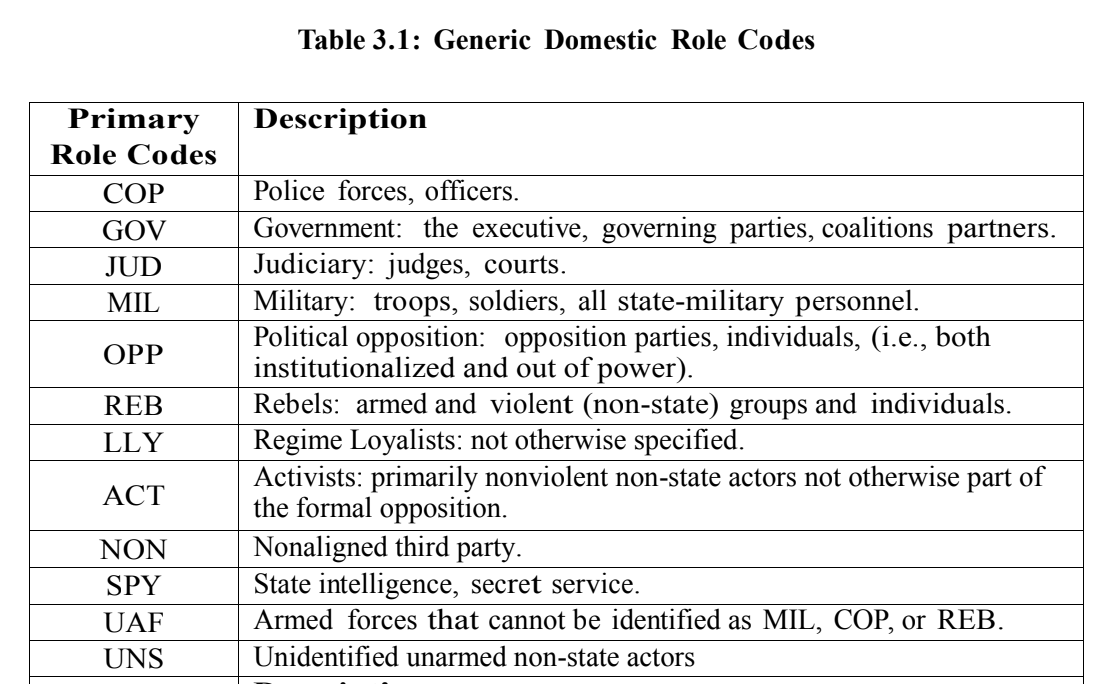

#### Combined Dataset Option 2: CCC

In [ ]:
# final additions to ccc data before joining data together
ccc_any = ccc.filter(like='_any').columns
print(f'The fields being used to indicate violent protests are {ccc_any.values}.\nThese fields contain a 1 or 0. The violent_sum contains a sum of these values for each row, as a way to view the violence of these protest on a scale.')

# two options for potential y variable
ccc['violent'] = ccc[ccc_any].any(axis=1)
ccc['violent_sum'] = ccc[ccc_any].sum(axis = 1)

The fields being used to indicate violent protests are ['arrests_any' 'injuries_crowd_any' 'injuries_police_any'
 'property_damage_any'].
These fields contain a 1 or 0. The violent_sum contains a sum of these values for each row, as a way to view the violence of these protest on a scale.


In [ ]:
# joined CPI monthly data first on both month and year
# Census Bureau wealth (by percentile) added, but it only has values by year
# either 'violent' or 'violent_sum' are variables we could potentially predict - we would just want to remove the _any variables because those

ccc_combined = ccc[['year', 'month', 'state', 'size_cat'] + ['violent', 'violent_sum']]\
.merge(CPI_month,  how = 'left', left_on = ['year','month'], right_on = ['year','month'])\
.merge(wealth, how = 'left', left_on = 'year', right_on = 'year').dropna()

In [ ]:
display(ccc_combined['violent'].value_counts())
display(ccc_combined['violent_sum'].value_counts())
display(ccc_combined.head())
print(f'\nThe ccc_combined dataset has {ccc_combined.shape[0]} rows and {ccc_combined.shape[1]} columns.')

,count
violent,
False,140694
True,2578


,count
violent_sum,
0,140694
1,2248
2,267
3,52
4,11


,year,month,state,size_cat,violent,violent_sum,CPI,Monthly % Change,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
0,2017,1,DC,0,False,0,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
1,2017,1,MN,0,False,0,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
2,2017,1,MN,1,True,1,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
3,2017,1,RI,0,False,0,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
4,2017,1,TN,0,False,0,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32



The ccc_combined dataset has 143272 rows and 21 columns.


`size_cat`'s description from data dictionary:

Ordered categorical indicator of crowd size, representing orders of magnitude and based on *size_mean*. 0 = unknown; 1 = 1-99; 2 = 100-999; 3 = 1,000-9,999; 4 = 10,000+.

In [ ]:
ccc_combined['size_cat'].value_counts()

,count
size_cat,
0,84908
1,34044
2,21028
3,2953
4,339


In [ ]:
# packages to preprocess data before ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

####ANOVA Tests

In [ ]:
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt

##### removing since CCC data is by month and wealth inequality data is annual
# # one-way ANOVA test for 90th/10th ratio with violent protests by state

# # include state with highest # of violent protests, 12th most, and 25th most
# states_ANOVA = []
# for i in [0, 11, 24]:
#   states_ANOVA.append(ccc_combined[ccc_combined['violent'] == True]['state'].value_counts().index[i])
# print(f'The states included in this ANOVA test are {states_ANOVA[0]} (most violent protests), {states_ANOVA[1]} (12th most violent protests), and {states_ANOVA[2]} (25th most violent protests).\n\
# This will test the null hypothesis that the average ratio of 90th percentile income and 10th percentile income between these groups is the same.\n')

# state_1 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[0])]['90th/10th']
# state_12 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[1])]['90th/10th']
# state_25 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[2])]['90th/10th']

# # ANOVA test
# f_stat, p_val = f_oneway(state_1, state_12, state_25)
# print(f'The results of the ANOVA test are an F statistic of {f_stat} with a p-value of {p_val}.\n')

# # Tukey test to analyze differences between groups in pairs
# tukey = tukey_hsd(state_1, state_12, state_25)
# print(tukey)

# fig, ax = plt.subplots(1, 1, figsize = (8,8))
# ax.boxplot([state_1, state_12, state_25], labels = states_ANOVA)
# ax.set_xlabel('State')
# ax.set_ylabel('90th/10th Percentile Ratio')
# ax.set_title('90th/10th Percentile Income Ratio by State')

The states included in this ANOVA test are CA (most violent protests), GA (12th most violent protests), and ID (25th most violent protests).
This will test the null hypothesis that the average monthly percentage change in CPI between these groups is the same.

The results of the ANOVA test are an F statistic of 22.03501603420404 with a p-value of 7.435687542914328e-10.

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.054     0.982    -0.750     0.642
 (0 - 2)     -3.169     0.000    -4.294    -2.044
 (1 - 0)      0.054     0.982    -0.642     0.750
 (1 - 2)     -3.115     0.000    -4.380    -1.851
 (2 - 0)      3.169     0.000     2.044     4.294
 (2 - 1)      3.115     0.000     1.851     4.380



Text(0.5, 1.0, 'Monthly % Change in CPI by State')

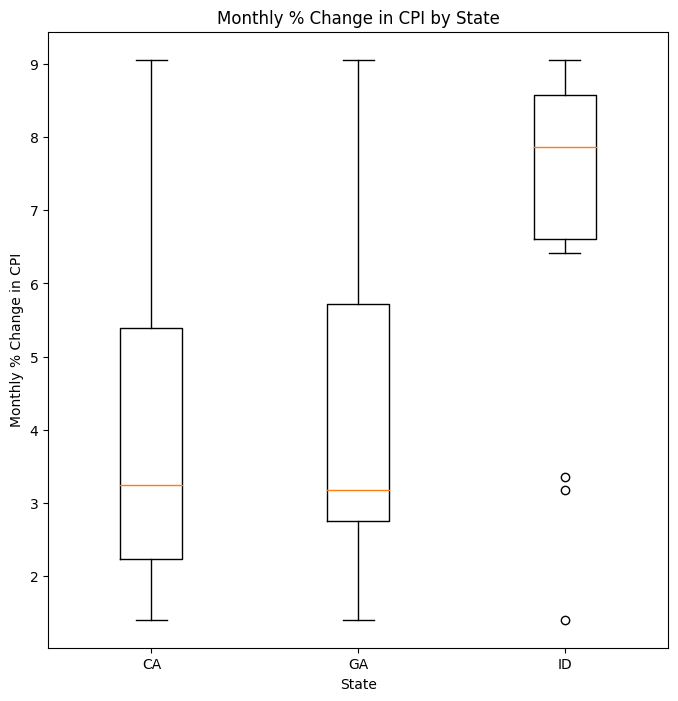

In [ ]:
# one-way ANOVA test for Monthly % Change in CPI

# include state with highest # of violent protests, 12th most, and 25th most
states_ANOVA = []
for i in [0, 11, 24]:
  states_ANOVA.append(ccc_combined[ccc_combined['violent'] == True]['state'].value_counts().index[i])
print(f'The states included in this ANOVA test are {states_ANOVA[0]} (most violent protests), {states_ANOVA[1]} (12th most violent protests), and {states_ANOVA[2]} (25th most violent protests).\n\
This will test the null hypothesis that the average monthly percentage change in CPI between these groups is the same.\n')

state_1 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[0])]['Monthly % Change']
state_12 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[1])]['Monthly % Change']
state_25 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[2])]['Monthly % Change']

# ANOVA test
f_stat, p_val = f_oneway(state_1, state_12, state_25)
print(f'The results of the ANOVA test are an F statistic of {f_stat} with a p-value of {p_val}.\n')

# Tukey test to analyze differences between groups in pairs
tukey = tukey_hsd(state_1, state_12, state_25)
print(tukey)

fig, ax = plt.subplots(1, 1, figsize = (8,8))
ax.boxplot([state_1, state_12, state_25], labels = states_ANOVA)
ax.set_xlabel('State')
ax.set_ylabel('Monthly % Change in CPI')
ax.set_title('Monthly % Change in CPI by State')

In [ ]:
df_x

,CA,GA,ID
0,2.5000,1.8749,1.3998
1,2.7380,1.7280,6.8090
2,2.7380,1.7280,7.0364
3,2.7380,1.9390,7.4799
4,2.7380,2.2330,7.8711
...,...,...,...
357,3.3521,NaN,NaN
358,3.3521,NaN,NaN
359,3.3521,NaN,NaN
360,3.3521,NaN,NaN


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
# one-way ANOVA test for Monthly % Change in CPI

# include state with highest # of violent protests, 12th most, and 25th most
states_ANOVA = []
for i in [0, 11, 24]:
  states_ANOVA.append(ccc_combined[ccc_combined['violent'] == True]['state'].value_counts().index[i])
print(f'The states included in this ANOVA test are {states_ANOVA[0]} (most violent protests), {states_ANOVA[1]} (12th most violent protests), and {states_ANOVA[2]} (25th most violent protests).\n\
This will test the null hypothesis that the average monthly percentage change in CPI between these groups is the same.\n')

state_1 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[0])]['Monthly % Change']
state_12 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[1])]['Monthly % Change']
state_25 = ccc_combined[(ccc_combined['violent'] == True) & (ccc_combined['state'] == states_ANOVA[2])]['Monthly % Change']

# ANOVA test
f_stat, p_val = f_oneway(state_1, state_12, state_25)
print(f'The results of the ANOVA test are an F statistic of {f_stat} with a p-value of {p_val}.\n')

# Tukey test to analyze differences between groups in pairs
tukey = tukey_hsd(state_1, state_12, state_25)
print(tukey)

state_1 = state_1.reset_index(drop = True)
state_12 = state_12.reset_index(drop = True)
state_25 = state_25.reset_index(drop = True)

df_x = pd.DataFrame({
    'CA': state_1,
    'GA': state_12,
    'ID': state_25
})

colors=['rgba(68, 1, 84, 0.8)', 'rgba(32, 144, 140, 0.8)', 'rgba(94, 201, 98, 0.8)']
borders=['rgba(68, 1, 84, 1)', 'rgba(32, 144, 140, 1)', 'rgba(94, 201, 98, 1)']

fig = go.Figure()
for i in range(3):
    fig.add_trace(go.Box(
        y=df_x[states_ANOVA[i]],
        name=states_ANOVA[i],
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='outliers',
        marker_color=colors[i],
        line_color=borders[i],
        showlegend=False
    ))

fig.add_shape(
    type="rect",
    x0=0, y0=0, x1=1, y1=1,
    xref="paper", yref="paper",
    line=dict(color="rgba(1,1,1,1)", width=1)
)

fig.update_layout(title_text='Monthly % Change in CPI by State',
                  title_x=0.5,
                  margin=dict(l=20, r=20, t=60, b=40),  # Margins for better spacing
                  font=dict(size=16),  # Font size for labels
                  title_font=dict(size=20),  # Font size for the title
                  xaxis_title_font=dict(size=14),  # Font size for x-axis title
                  yaxis_title_font=dict(size=14),  # Font size for y-axis title
                  plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot area
                  paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
                  width=711,  # Width of the figure
                  height=711,
                  yaxis=dict(title='Monthly % Change in CPI', zeroline=False, gridcolor='rgba(1,1,1,0.075)', gridwidth=2),
                  xaxis=dict(title='State')
)
fig.update_xaxes(
    constrain='domain',
    ticks='outside',
    tickwidth=2,
    ticklen=3
)
fig.update_yaxes(
    ticks='outside',
    tickwidth=2,
    ticklen=3
)
fig.show()

The states included in this ANOVA test are CA (most violent protests), GA (12th most violent protests), and ID (25th most violent protests).
This will test the null hypothesis that the average monthly percentage change in CPI between these groups is the same.

The results of the ANOVA test are an F statistic of 22.03501603420404 with a p-value of 7.435687542914328e-10.

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.054     0.982    -0.750     0.642
 (0 - 2)     -3.169     0.000    -4.294    -2.044
 (1 - 0)      0.054     0.982    -0.642     0.750
 (1 - 2)     -3.115     0.000    -4.380    -1.851
 (2 - 0)      3.169     0.000     2.044     4.294
 (2 - 1)      3.115     0.000     1.851     4.380



####CCC Clustering

In [ ]:
# split ccc into  X and y
# excluding all variables from ccc from X except size of crowd to focus on inflation/wealth data
ccc_X = ccc_combined.drop(columns = ['violent', 'violent_sum', 'year', 'state', 'month'])
ccc_y = ccc_combined['violent']

ccc_X.head()

,size_cat,CPI,Monthly % Change,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
0,0,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
1,0,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
2,1,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
3,0,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
4,0,242.839,2.5,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32


In [ ]:
# preprocess X for clustering

ct_ccc = ColumnTransformer(
    [('num', StandardScaler(), ccc_X.drop(columns = ['size_cat']).columns),
    ('cat', OneHotEncoder(), ['size_cat'])]
)

display(ct_ccc)

X_prepared = ct_ccc.fit_transform(ccc_X)
X_prepared = pd.DataFrame(data = X_prepared, columns = ct_ccc.get_feature_names_out())

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['CPI', 'Monthly % Change', '10th percentile', '20th percentile',
       '30th percentile', '40th percentile', '50th percentile (median)',
       '60th percentile', '70th percentile', '80th percentile',
       '90th percentile', '95th percentile', '90th/10th', '90th/50th',
       '50th/10th'],
      dtype='object')),
                                ('cat', OneHotEncoder(), ['size_cat'])])

In [ ]:
# code has worked for me in the past for a smaller dataset, took too long to run.

# # K Means Clustering
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt


# # Create models with varying numbers of clusters
# kmeans_mods = [KMeans(n_clusters = i, n_init = 10, random_state = 42).fit(ccc_X) for i in range(2,7)]

# # Gather inertia values from models
# mod_inertias = [mod.inertia_ for mod in kmeans_mods]

# # Gather silhouette scores from models
# sil_scores = [silhouette_score(ccc_X, mod.labels_) for mod in kmeans_mods[1:]]

# # Visualize metrics
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

# fig.suptitle('K Means Clustering Measures', fontweight = 'bold', fontsize = 18)

# ax1.plot(range(2,10), mod_inertias, color = 'royalblue', marker = 'o')
# ax1.set_title('Inertia: Sum of Squared Differences from Cluster', fontsize = 14)
# ax1.set_xlabel('n_clusters', fontsize = 12)
# ax1.set_ylabel('Inertia', fontsize = 12)

# ax2.plot(range(2, 15), sil_scores, color = 'royalblue', marker = 'o')
# ax2.set_title('Silhouette Score: Goodness of Fit', fontsize = 14)
# ax2.set_xlabel('n_clusters', fontsize = 12)
# ax2.set_ylabel('Silhouette Score', fontsize = 12);

Inertia: 210310.2673102706
Silhouette Score: 0.5887443708405312



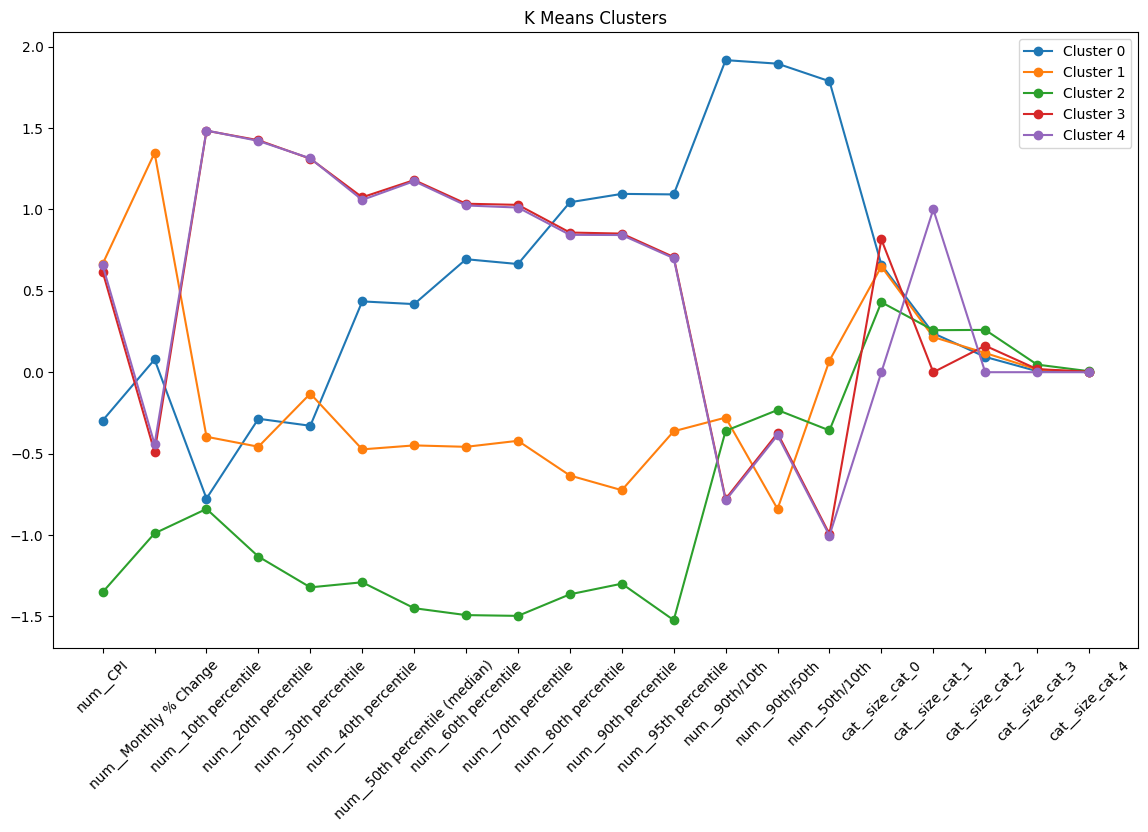

In [ ]:
# K Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

n = 5
# knn model
km_5 = KMeans(n_clusters = n, random_state = 42).fit(X_prepared)

# calculate inertia
mod_inertia = km_5.inertia_

# calculate silhouette score
sil_score = silhouette_score(X_prepared, km_5.predict(X_prepared))

print(f'Inertia: {mod_inertia}\nSilhouette Score: {sil_score}\n')

# Plot cluster centers
fig, ax = plt.subplots(1, 1, figsize = (14, 8))

for i in range(n):
  ax.plot(X_prepared.columns, km_5.cluster_centers_[i], marker = 'o', label = f'Cluster {i}')
ax.legend(loc = 'upper right')
ax.set_title('K Means Clusters')
ax.tick_params(axis = 'x', labelrotation = 45)

Inertia: 867504.2067305624
Silhouette Score: 0.4667472901734673



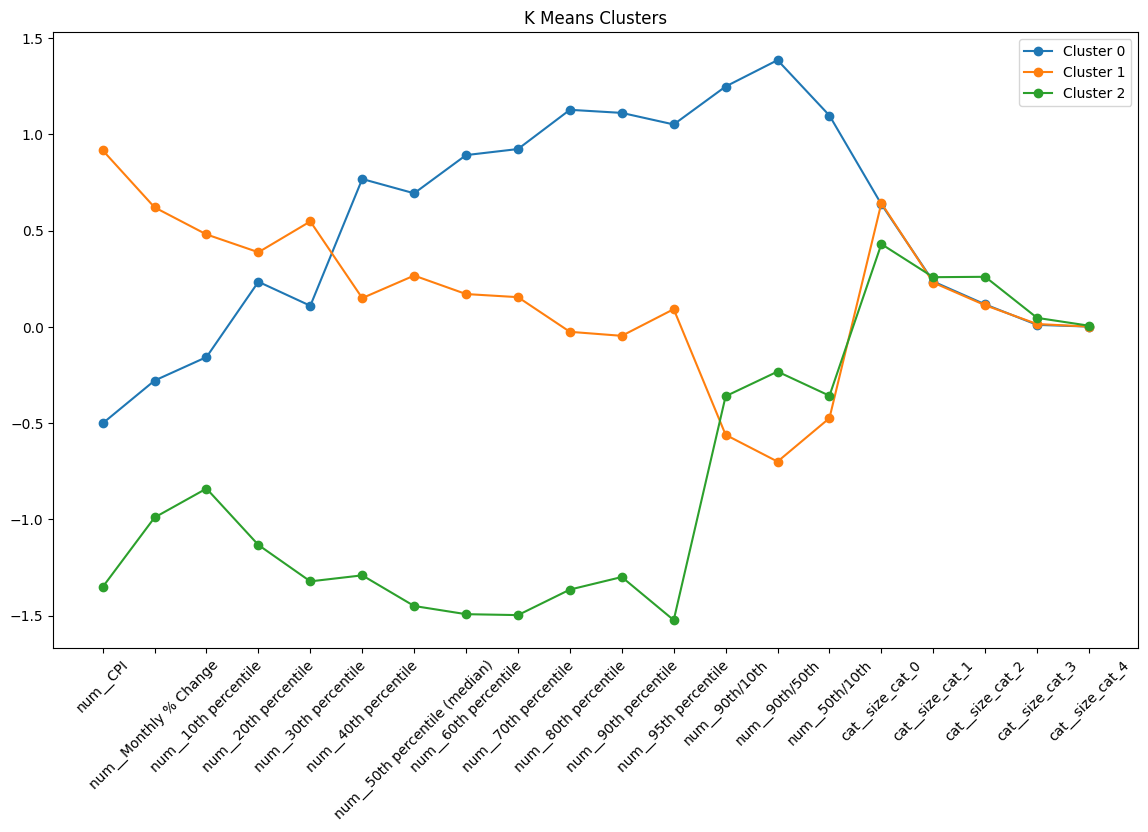

In [ ]:
# since there appears to be three distinct clusters forming, one more attempt with n = 3
n = 3

# knn model
km_3 = KMeans(n_clusters = n, random_state = 42).fit(X_prepared)

# calculate inertia
mod_inertia = km_3.inertia_

# calculate silhouette score
sil_score = silhouette_score(X_prepared, km_3.predict(X_prepared))

print(f'Inertia: {mod_inertia}\nSilhouette Score: {sil_score}\n')

# Plot cluster centers
fig, ax = plt.subplots(1, 1, figsize = (14, 8))

for i in range(n):
  ax.plot(X_prepared.columns, km_3.cluster_centers_[i], marker = 'o', label = f'Cluster {i}')
ax.legend(loc = 'upper right')
ax.set_title('K Means Clusters')
ax.tick_params(axis = 'x', labelrotation = 45)

####CCC Regression

Logistic Regression - Violent/Non-Violent

In [ ]:
# split ccc into  X and y
# excluding all variables from ccc from X except size of crowd to focus on inflation/wealth data
ccc_X = ccc_combined.drop(columns = ['violent', 'violent_sum', 'year', 'state', 'month'])
ccc_y = ccc_combined['violent']

X_train, X_test, y_train, y_test = train_test_split(ccc_X, ccc_y, test_size = .2, random_state = 42)

display(X_train.head())
display(y_train.head())

,size_cat,CPI,Monthly % Change,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
99731,2,278.802,7.0364,17540.0,31360.0,45380.0,61590.0,79260.0,100500.0,126800.0,167000.0,237400.0,320600.0,13.53,2.99,4.52
5782,1,244.786,1.7280,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
31082,0,252.038,2.1766,17550.0,30710.0,44390.0,59980.0,75790.0,95420.0,120200.0,155900.0,221100.0,298400.0,12.60,2.92,4.32
154405,1,305.109,2.9692,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25
170674,0,306.746,3.3521,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25


,violent
99731,False
5782,False
31082,False
154405,False
170674,False


In [ ]:
# preprocess data

ct_ccc = ColumnTransformer(
    [('num', StandardScaler(), X_train.drop(columns = ['size_cat']).columns),
    ('cat', OneHotEncoder(), ['size_cat'])]
)

display(ct_ccc)

X_train_prepared = ct_ccc.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train_prepared, columns = ct_ccc.get_feature_names_out(), index = X_train.index)

X_test_prepared = ct_ccc.transform(X_test)
X_test = pd.DataFrame(data = X_test_prepared, columns = ct_ccc.get_feature_names_out(), index = X_test.index)

display(X_train.head())
display(y_train.head())

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['CPI', 'Monthly % Change', '10th percentile', '20th percentile',
       '30th percentile', '40th percentile', '50th percentile (median)',
       '60th percentile', '70th percentile', '80th percentile',
       '90th percentile', '95th percentile', '90th/10th', '90th/50th',
       '50th/10th'],
      dtype='object')),
                                ('cat', OneHotEncoder(), ['size_cat'])])

,num__CPI,num__Monthly % Change,num__10th percentile,num__20th percentile,num__30th percentile,num__40th percentile,num__50th percentile (median),num__60th percentile,num__70th percentile,num__80th percentile,num__90th percentile,num__95th percentile,num__90th/10th,num__90th/50th,num__50th/10th,cat__size_cat_0,cat__size_cat_1,cat__size_cat_2,cat__size_cat_3,cat__size_cat_4
99731,0.027287,0.936253,-0.774890,-0.285337,-0.328362,0.435461,0.418399,0.693980,0.664618,1.043263,1.094193,1.090615,1.910712,1.889408,1.781967,0.0,0.0,1.0,0.0,0.0
5782,-1.535258,-1.243300,-0.996211,-1.508729,-1.995270,-2.407480,-1.682086,-1.637125,-1.604488,-1.464230,-1.487384,-2.100215,-0.377998,-0.233891,-0.359377,0.0,1.0,0.0,0.0,0.0
31082,-1.202133,-1.059112,-0.759081,-0.942531,-0.980630,-0.726249,-1.333688,-1.420665,-1.444692,-1.315480,-1.205244,-1.231891,-0.353650,-0.233891,-0.359377,1.0,0.0,0.0,0.0,0.0
154405,1.235715,-0.733681,1.501559,1.372814,1.338546,0.875612,1.100046,0.902114,0.824414,0.682014,0.741519,0.619837,-0.889306,-0.537219,-1.108847,0.0,1.0,0.0,0.0,0.0
170674,1.310912,-0.576468,1.501559,1.372814,1.338546,0.875612,1.100046,0.902114,0.824414,0.682014,0.741519,0.619837,-0.889306,-0.537219,-1.108847,1.0,0.0,0.0,0.0,0.0


,violent
99731,False
5782,False
31082,False
154405,False
170674,False


This model produced an accuracy score of 0.9819, but the confusion matrix shows that none of the violent protests were predicted accurately:



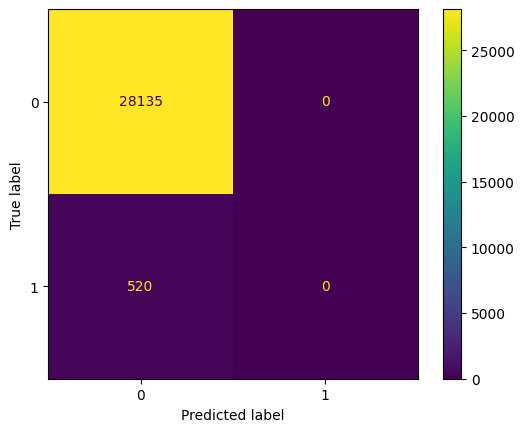

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

log_reg_acc = log_reg.score(X_test, y_test)
log_reg_cm = confusion_matrix(y_test, log_reg.predict(X_test))
print(f'This model produced an accuracy score of {round(log_reg_acc,4)}, but the confusion matrix shows that none of the violent protests were predicted accurately:\n')
ConfusionMatrixDisplay(log_reg_cm).plot();

Accuracy Score: 0.9819



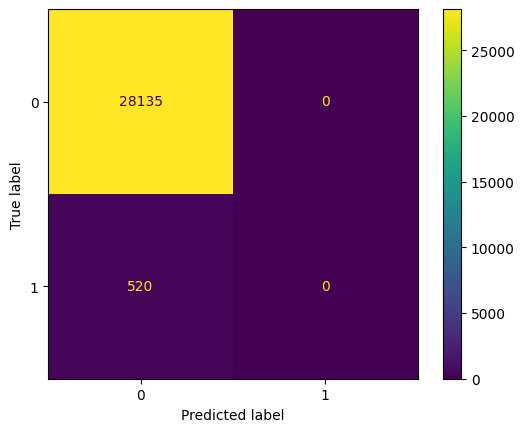

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train, y_train)

dec_tree_acc = dec_tree.score(X_test, y_test)
dec_tree_cm = confusion_matrix(y_test, dec_tree.predict(X_test))
print(f'Accuracy Score: {round(dec_tree_acc,4)}\n')
ConfusionMatrixDisplay(dec_tree_cm).plot();

In [ ]:
pd.DataFrame(data = dec_tree.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
num__CPI,0.245458
cat__size_cat_0,0.228601
num__Monthly % Change,0.223865
cat__size_cat_3,0.084251
num__10th percentile,0.054899
cat__size_cat_1,0.051747
cat__size_cat_2,0.039369
cat__size_cat_4,0.037873
num__70th percentile,0.019066
num__90th/50th,0.006858


Linear Regression - Violent_Sum

In [ ]:
# attempt at linear regression
# violent_sum as dependent variable
ccc_X = ccc_combined.drop(columns = ['violent', 'violent_sum', 'year', 'month', 'state'])
ccc_y = ccc_combined['violent_sum']

X_train, X_test, y_train, y_test = train_test_split(ccc_X, ccc_y, test_size = .2, random_state = 42)

display(X_train.head())
display(y_train.head())

,size_cat,CPI,Monthly % Change,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
99731,2,278.802,7.0364,17540.0,31360.0,45380.0,61590.0,79260.0,100500.0,126800.0,167000.0,237400.0,320600.0,13.53,2.99,4.52
5782,1,244.786,1.7280,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
31082,0,252.038,2.1766,17550.0,30710.0,44390.0,59980.0,75790.0,95420.0,120200.0,155900.0,221100.0,298400.0,12.60,2.92,4.32
154405,1,305.109,2.9692,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25
170674,0,306.746,3.3521,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25


,violent_sum
99731,0
5782,0
31082,0
154405,0
170674,0


In [ ]:
# preprocess data

ct_ccc = ColumnTransformer(
    [('num', StandardScaler(), X_train.drop(columns = ['size_cat']).columns),
    ('cat', OneHotEncoder(), ['size_cat'])]
)

display(ct_ccc)

X_train_prepared = ct_ccc.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train_prepared, columns = ct_ccc.get_feature_names_out(), index = X_train.index)

X_test_prepared = ct_ccc.transform(X_test)
X_test = pd.DataFrame(data = X_test_prepared, columns = ct_ccc.get_feature_names_out(), index = X_test.index)

display(X_train.head())
display(y_train.head())

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['CPI', 'Monthly % Change', '10th percentile', '20th percentile',
       '30th percentile', '40th percentile', '50th percentile (median)',
       '60th percentile', '70th percentile', '80th percentile',
       '90th percentile', '95th percentile', '90th/10th', '90th/50th',
       '50th/10th'],
      dtype='object')),
                                ('cat', OneHotEncoder(), ['size_cat'])])

,num__CPI,num__Monthly % Change,num__10th percentile,num__20th percentile,num__30th percentile,num__40th percentile,num__50th percentile (median),num__60th percentile,num__70th percentile,num__80th percentile,num__90th percentile,num__95th percentile,num__90th/10th,num__90th/50th,num__50th/10th,cat__size_cat_0,cat__size_cat_1,cat__size_cat_2,cat__size_cat_3,cat__size_cat_4
99731,0.027287,0.936253,-0.774890,-0.285337,-0.328362,0.435461,0.418399,0.693980,0.664618,1.043263,1.094193,1.090615,1.910712,1.889408,1.781967,0.0,0.0,1.0,0.0,0.0
5782,-1.535258,-1.243300,-0.996211,-1.508729,-1.995270,-2.407480,-1.682086,-1.637125,-1.604488,-1.464230,-1.487384,-2.100215,-0.377998,-0.233891,-0.359377,0.0,1.0,0.0,0.0,0.0
31082,-1.202133,-1.059112,-0.759081,-0.942531,-0.980630,-0.726249,-1.333688,-1.420665,-1.444692,-1.315480,-1.205244,-1.231891,-0.353650,-0.233891,-0.359377,1.0,0.0,0.0,0.0,0.0
154405,1.235715,-0.733681,1.501559,1.372814,1.338546,0.875612,1.100046,0.902114,0.824414,0.682014,0.741519,0.619837,-0.889306,-0.537219,-1.108847,0.0,1.0,0.0,0.0,0.0
170674,1.310912,-0.576468,1.501559,1.372814,1.338546,0.875612,1.100046,0.902114,0.824414,0.682014,0.741519,0.619837,-0.889306,-0.537219,-1.108847,1.0,0.0,0.0,0.0,0.0


,violent_sum
99731,0
5782,0
31082,0
154405,0
170674,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_reg_r2 = r2_score(y_test, y_pred)
lin_reg_rmse = root_mean_squared_error(y_test, y_pred)
print(f'The R squared value of this model is {round(lin_reg_r2,4)} and the RMSE is {round(lin_reg_rmse,4)}')

The R squared value of this model is 0.0097 and the RMSE is 0.1613


Linear Regression - Only "Important" Variables

In [ ]:
# one more attempt only using "important" variables from tree model

# X and y with selected variables
ccc_X = ccc_combined[['CPI', 'size_cat', 'Monthly % Change']]
ccc_y = ccc_combined['violent_sum']

X_train, X_test, y_train, y_test = train_test_split(ccc_X, ccc_y, test_size = .2, random_state = 42)

# preprocess data

ct_ccc = ColumnTransformer(
    [('num', StandardScaler(), X_train.drop(columns = ['size_cat']).columns),
    ('cat', OneHotEncoder(), ['size_cat'])]
)

display(ct_ccc)

X_train_prepared = ct_ccc.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train_prepared, columns = ct_ccc.get_feature_names_out(), index = X_train.index).drop(columns = ['cat__size_cat_1','cat__size_cat_2','cat__size_cat_3','cat__size_cat_4'])

X_test_prepared = ct_ccc.transform(X_test)
X_test = pd.DataFrame(data = X_test_prepared, columns = ct_ccc.get_feature_names_out(), index = X_test.index).drop(columns = ['cat__size_cat_1','cat__size_cat_2','cat__size_cat_3','cat__size_cat_4'])

display(X_train.head())
display(y_train.head())

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['CPI', 'Monthly % Change'], dtype='object')),
                                ('cat', OneHotEncoder(), ['size_cat'])])

,num__CPI,num__Monthly % Change,cat__size_cat_0
99731,0.027287,0.936253,0.0
5782,-1.535258,-1.243300,0.0
31082,-1.202133,-1.059112,1.0
154405,1.235715,-0.733681,0.0
170674,1.310912,-0.576468,1.0


,violent_sum
99731,0
5782,0
31082,0
154405,0
170674,0


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_reg_r2 = r2_score(y_test, y_pred)
lin_reg_rmse = root_mean_squared_error(y_test, y_pred)
print(f'The R squared value of this model is {round(lin_reg_r2,4)} and the RMSE is {round(lin_reg_rmse,4)}')

The R squared value of this model is 0.0081 and the RMSE is 0.1614


Linear Regression - Count of Protests

In [ ]:
# new dataset with protest_count as dependent variable
ccc_count = ccc_combined[['year', 'month', 'state', 'violent']].groupby(['year', 'month', 'state']).count().reset_index().rename(columns = {'violent':'protest_count'})\
.merge(CPI_month,  how = 'left', left_on = ['year','month'], right_on = ['year','month'])\
.merge(wealth, how = 'left', left_on = 'year', right_on = 'year').dropna()

ccc_count

,year,month,state,protest_count,CPI,Monthly % Change,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
0,2017,1,AK,28,242.839,2.5000,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
1,2017,1,AL,9,242.839,2.5000,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
2,2017,1,AR,8,242.839,2.5000,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
3,2017,1,AZ,29,242.839,2.5000,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
4,2017,1,CA,133,242.839,2.5000,17400.0,30150.0,42850.0,57650.0,75100.0,94900.0,119700.0,155200.0,219100.0,290100.0,12.59,2.92,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,2023,12,VT,14,306.746,3.3521,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25
3680,2023,12,WA,86,306.746,3.3521,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25
3681,2023,12,WI,48,306.746,3.3521,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25
3682,2023,12,WV,5,306.746,3.3521,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25


In [ ]:
# split data into X and y sets

ccc_X = ccc_count.drop(columns = ['protest_count'])
ccc_y = ccc_count['protest_count']

# split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(ccc_X, ccc_y, test_size = 0.2, random_state = 42)

# preprocess X values
ct_ccc = ColumnTransformer(
    [('num', StandardScaler(), X_train.drop(columns = ['state','month', 'year']).columns),
    ('cat', OneHotEncoder(), ['state','month', 'year'])]
)

X_train_prepared = ct_ccc.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train_prepared.todense(), columns = ct_ccc.get_feature_names_out(), index = X_train.index)

X_test_prepared = ct_ccc.transform(X_test)
X_test = pd.DataFrame(data = X_test_prepared.todense(), columns = ct_ccc.get_feature_names_out(), index = X_test.index)

# preprocess y values
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train.values.reshape(-1,1))
y_test = y_scale.transform(y_test.values.reshape(-1,1))

display(X_train.head())
display(y_train)

,num__CPI,num__Monthly % Change,num__10th percentile,num__20th percentile,num__30th percentile,num__40th percentile,num__50th percentile (median),num__60th percentile,num__70th percentile,num__80th percentile,num__90th percentile,num__95th percentile,num__90th/10th,num__90th/50th,num__50th/10th,cat__state_AK,cat__state_AL,cat__state_AR,cat__state_AZ,cat__state_CA,cat__state_CO,cat__state_CT,cat__state_DC,cat__state_DE,cat__state_FL,cat__state_GA,cat__state_GU,cat__state_HI,cat__state_IA,cat__state_ID,cat__state_IL,cat__state_IN,cat__state_KS,cat__state_KY,cat__state_LA,cat__state_MA,cat__state_MD,cat__state_ME,cat__state_MI,cat__state_MN,cat__state_MO,cat__state_MS,cat__state_MT,cat__state_NC,cat__state_ND,cat__state_NE,cat__state_NH,cat__state_NJ,cat__state_NM,cat__state_NV,cat__state_NY,cat__state_OH,cat__state_OK,cat__state_OR,cat__state_PA,cat__state_PR,cat__state_RI,cat__state_SC,cat__state_SD,cat__state_TN,cat__state_TX,cat__state_TÎ§,cat__state_UT,cat__state_VA,cat__state_VI,cat__state_VM,cat__state_VT,cat__state_WA,cat__state_WI,cat__state_WV,cat__state_WY,cat__month_1,cat__month_2,cat__month_3,cat__month_4,cat__month_5,cat__month_6,cat__month_7,cat__month_8,cat__month_9,cat__month_10,cat__month_11,cat__month_12,cat__year_2017,cat__year_2018,cat__year_2019,cat__year_2021,cat__year_2022,cat__year_2023
1001,-0.823398,-0.523800,-0.726450,-0.799937,-0.730027,-0.488566,-1.084544,-1.162639,-1.177333,-1.128573,-1.043206,-0.917273,-0.306715,-0.281837,-0.278805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2494,0.592555,1.682700,-0.379779,-0.371172,0.000931,-0.290943,-0.318003,-0.329088,-0.308358,-0.520592,-0.603802,-0.173820,-0.226993,-0.962916,0.185070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1284,-0.795141,-1.026843,1.368653,1.424283,1.179528,1.352154,1.289542,1.283889,1.402437,1.246353,1.115043,0.945838,-0.439585,0.058702,-0.626712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1151,-0.828241,-0.746759,-0.726450,-0.799937,-0.730027,-0.488566,-1.084544,-1.162639,-1.177333,-1.128573,-1.043206,-0.917273,-0.306715,-0.281837,-0.278805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3629,1.639159,-0.336893,1.428944,1.245631,1.264523,0.764930,1.026728,0.850875,0.750706,0.657372,0.740257,0.668163,-0.891343,-0.622376,-1.090588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


array([[-0.41825001],
       [ 0.53820074],
       [-0.59072474],
       ...,
       [-0.40257049],
       [-0.29281385],
       [ 1.69848525]])

In [ ]:
# train and evaluate linear regression model

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# predictions
y_pred = lin_reg.predict(X_test)

# scores for evaluation
lin_reg_r2 = r2_score(y_test, y_pred)
lin_reg_rmse = root_mean_squared_error(y_test, y_pred)

print(f'The R squared value of this model is {round(lin_reg_r2,4)} and the RMSE is {round(lin_reg_rmse,4)}')

The R squared value of this model is 0.7051 and the RMSE is 0.5424


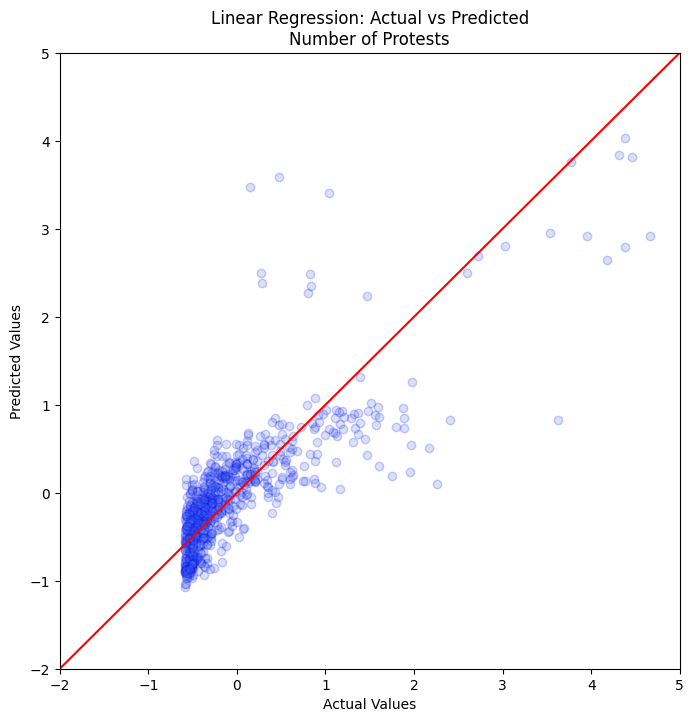

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

ax.scatter(y_test, y_pred, color = 'royalblue', marker = 'o', alpha = 0.2, edgecolors = 'blue')
ax.set_xlim((-2,5))
ax.set_ylim((-2,5))
ax.axline((0,0), slope = 1, color = 'red')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Linear Regression: Actual vs Predicted\nNumber of Protests');

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# train and evaluate random forest model

rf_reg = RandomForestRegressor(random_state = 42)
rf_reg.fit(X_train, y_train)

# predictions
y_pred = lin_reg.predict(X_test)

# scores for evaluation
rf_reg_r2 = r2_score(y_test, y_pred)
rf_reg_rmse = root_mean_squared_error(y_test, y_pred)

print(f'The R squared value of this model is {round(rf_reg_r2,4)} and the RMSE is {round(rf_reg_rmse,4)}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The R squared value of this model is 0.7051 and the RMSE is 0.5424


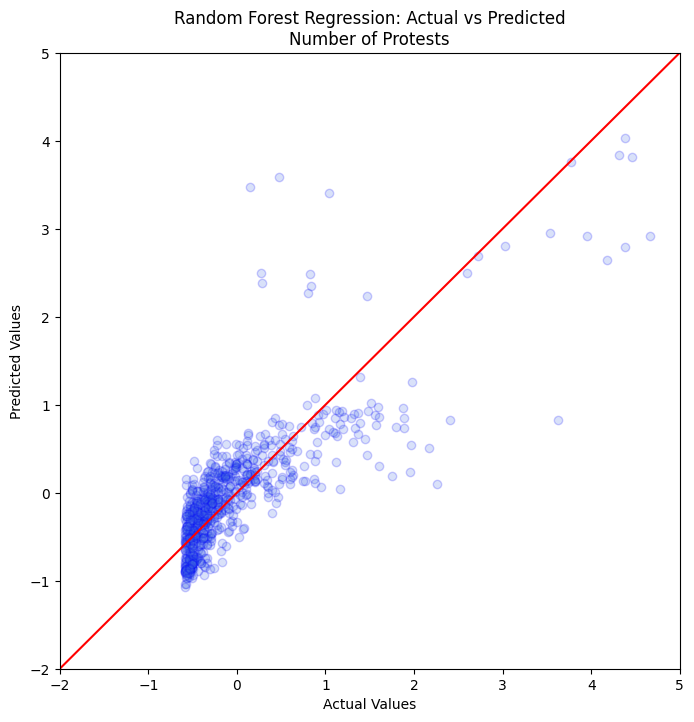

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

ax.scatter(y_test, y_pred, color = 'royalblue', marker = 'o', alpha = 0.2, edgecolors = 'blue')
ax.set_xlim((-2,5))
ax.set_ylim((-2,5))
ax.axline((0,0), slope = 1, color = 'red')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Random Forest Regression: Actual vs Predicted\nNumber of Protests');

In [ ]:
pd.DataFrame(data = rf_reg.feature_importances_, index = X_train.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False).round(2)[:5]

,Importance
cat__state_CA,0.28
cat__state_NY,0.14
num__CPI,0.14
num__Monthly % Change,0.11
cat__month_1,0.03
